In [1]:
import pandas as pd
import numpy as np

In [2]:
path_file_user_user = "data/resultado_user_user.csv"
path_file_item_item = "data/resultado_item_item_2.csv"
path_file_test = "data/only_jams_test_2.csv"

## Test

In [3]:
test = pd.read_csv(path_file_test)
test.drop(['Unnamed: 0'], axis=1,inplace = True)

In [4]:
test.head()

,user_id,song_id
0,0087ff24898df109af292b46cf5e54687bd084ed,SOGBOQX12A8C139DF7
1,00e0bff6727775a4da442c48b6586d8fa7205579,SOGYPGP12AB018223E
2,06261b0e16ca2158051b6f8a56e039d799bbbe1a,SOOBUXN12AB01887FA
3,065152d683cde51e15a3c1d9597650b16e37d972,SOKQBDZ12AB018019D
4,065152d683cde51e15a3c1d9597650b16e37d972,SOLLNRI12AB0187563


In [20]:
len(test)

54579

In [5]:
test_by_user = test.groupby("user_id").agg({"song_id": lambda x: set(x)}).reset_index()

In [6]:
test_by_user.head()

,user_id,song_id
0,00003a4459f33b92906be11abe0e93efc423c0ff,{SOWVBDQ12A8C13503D}
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,{SORGGRV12A8AE477C0}
2,000b474f815bcff17a4bc9ce5324f9352dafe07d,"{SOVHUFT12AAA15FD32, SOPXNZK12A8C13B49D}"
3,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,"{SOTIVSJ12A6310DA82, SOQZYQH12A8AE468E5}"
4,000ebc858861aca26bac9b49f650ed424cf882fc,"{SOPEPDC12A6D4F7599, SONLPYY12A8C13FFA6, SOYZF..."


In [7]:
def intersection_col(x):
    set1 = x["recomendacion"]
    set2 = x["song_id"]
    return set1.intersection(set2)

In [8]:
def sensibilidad(x):
    aux_len = len(x["interseccion"])
    aux_tot = len(x["song_id"])
    return aux_len/aux_tot

## User - user

In [9]:
user_res = pd.read_csv(path_file_user_user)
user_res.drop(['Unnamed: 0'], axis=1,inplace = True)

In [10]:
user_res.head()

,user_id,recomendacion
0,0087ff24898df109af292b46cf5e54687bd084ed,"['SOWKYUB12A8C1440CB', 'SODLAPJ12A8C142002', '..."
1,0097e6d8f988dc58f2cc3849400594989209cd30,"['SOTELBF12A6701FA4A', 'SOTRLCA12AF72A2D03', '..."
2,00ba4707e90378f254d7625ace448f1c699c97d5,"['SOFYCAM12A58A7A45B', 'SOEDXFM12A8C1459E9', '..."
3,00e0bff6727775a4da442c48b6586d8fa7205579,"['SOXWYZP12AF72A42A6', 'SOLWZVR12AB01849C6', '..."
4,028962a2d2b3619d8dd1cc66bc76ed7f102dc28b,"['SOHEMBB12A6701E907', 'SOKSNTY12A8C1380FB', '..."


In [11]:
test_user = test_by_user.merge(user_res, how = "left", on = "user_id").dropna()
test_user.head()

,user_id,song_id,recomendacion
0,00003a4459f33b92906be11abe0e93efc423c0ff,{SOWVBDQ12A8C13503D},"['SOTVLQY12A58A798C2', 'SOCIGMX12A8C144150', '..."
3,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,"{SOTIVSJ12A6310DA82, SOQZYQH12A8AE468E5}","['SOTVLQY12A58A798C2', 'SOTAIQR12A8C13403B', '..."
4,000ebc858861aca26bac9b49f650ed424cf882fc,"{SOPEPDC12A6D4F7599, SONLPYY12A8C13FFA6, SOYZF...","['SOSRERB12A8C139735', 'SOOFYTN12A6D4F9B35', '..."
5,000ef25cc955ad5841c915d269432eea41f4a1a5,{SOLEMPP12A8AE4640B},"['SOWUZYJ12AB01863AC', 'SOFGSSS12A67020463', '..."
6,00125672fad06bc57f5a4304cceea9effab07839,"{SOAUWYT12A81C206F1, SOIZFTE12AB0186842}","['SODEGIQ12A6D4FC6E3', 'SOVQJRY12A81C210C0', '..."


In [12]:
test_user["recomendacion"] = test_user["recomendacion"].str.replace("[","").str.replace("]","").str.replace("'","").str.split(",")

In [13]:
test_user["recomendacion"] = test_user["recomendacion"].apply(lambda x:set([w.strip() for w in x]))

In [14]:
test_user.head()

,user_id,song_id,recomendacion
0,00003a4459f33b92906be11abe0e93efc423c0ff,{SOWVBDQ12A8C13503D},"{SORWBFK12AF72A4BA9, SOOLPFK12A58A7BDE3, SOWKG..."
3,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,"{SOTIVSJ12A6310DA82, SOQZYQH12A8AE468E5}","{SOSELMV12A6D4FCF5A, SOCSCRC12AB017C60C, SOOBN..."
4,000ebc858861aca26bac9b49f650ed424cf882fc,"{SOPEPDC12A6D4F7599, SONLPYY12A8C13FFA6, SOYZF...","{SOJZYUB12A67020883, SOCSUOL12AAA8C6707, SOPUC..."
5,000ef25cc955ad5841c915d269432eea41f4a1a5,{SOLEMPP12A8AE4640B},"{SORCNJV12A58A7A6EF, SOKYYQU12A8AE46E26, SOIBT..."
6,00125672fad06bc57f5a4304cceea9effab07839,"{SOAUWYT12A81C206F1, SOIZFTE12AB0186842}","{SOFZZDU12AF72A1998, SOTFEIP12AB017ACB0, SOVAJ..."


In [15]:
test_user["interseccion"] = test_user.apply(intersection_col,axis = 1)

In [16]:
test_user["interseccion_count"] = test_user["interseccion"].apply(lambda x: len(x))

In [34]:
test_user["recomendacion_count"] = test_user["recomendacion"].apply(lambda x: len(x))

In [17]:
test_user["sensibilidad"] = test_user.apply(sensibilidad,axis = 1)

## La sensibilidad global

In [22]:
test_user["interseccion_count"].sum()/len(test)

0.2525147034573737

## Precisión

In [35]:
test_user["interseccion_count"].sum()/test_user["recomendacion_count"].sum()

0.008181423147336853

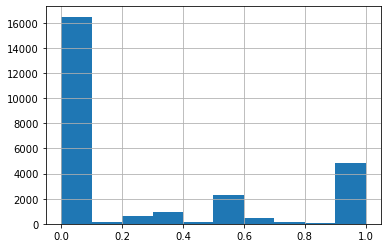

In [15]:
test_user["sensibilidad"].hist()

In [16]:
test_user["sensibilidad"].describe()

count    26113.000000
mean         0.268339
std          0.393706
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: sensibilidad, dtype: float64

## Item - item

In [23]:
item_res = pd.read_csv(path_file_item_item)
item_res.drop(['Unnamed: 0'], axis=1,inplace = True)

In [24]:
item_res.head()

,user_id,recomendacion
0,0087ff24898df109af292b46cf5e54687bd084ed,"['SOPOANU12A8AE48C9B', 'SOMHTUR12A6D4F8764', '..."
1,0097e6d8f988dc58f2cc3849400594989209cd30,"['SOTODTI12A8C1402D3', 'SOETUOD12AB0185397', '..."
2,00ba4707e90378f254d7625ace448f1c699c97d5,"['SOXEUDZ12A8C13145B', 'SOGFXGZ12A67AE1F23', '..."
3,00e0bff6727775a4da442c48b6586d8fa7205579,"['SOKUPAO12AB018D576', 'SOSXLTC12AF72A7F54', '..."
4,028962a2d2b3619d8dd1cc66bc76ed7f102dc28b,"['SOXEYIE12AB0180212', 'SOEUANM12A8AE47FD4', '..."


In [25]:
test_item = test_by_user.merge(item_res, how = "left", on = "user_id").dropna()
test_item.head()

,user_id,song_id,recomendacion
0,00003a4459f33b92906be11abe0e93efc423c0ff,{SOWVBDQ12A8C13503D},"['SOTLQWL12AB018167B', 'SOFCXNF12A58A7CF16', '..."
3,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,"{SOTIVSJ12A6310DA82, SOQZYQH12A8AE468E5}","['SOFGSSS12A67020463', 'SOGUWGW12A6D4F4789', '..."
4,000ebc858861aca26bac9b49f650ed424cf882fc,"{SOPEPDC12A6D4F7599, SONLPYY12A8C13FFA6, SOYZF...","['SOSIPFF12AB01853C6', 'SOOCEUK12AB018FDBB', '..."
5,000ef25cc955ad5841c915d269432eea41f4a1a5,{SOLEMPP12A8AE4640B},"['SOPULXR12A6D4F920D', 'SOMTBXX12AF729F5A6', '..."
6,00125672fad06bc57f5a4304cceea9effab07839,"{SOAUWYT12A81C206F1, SOIZFTE12AB0186842}","['SOZVVRE12A8C143150', 'SOSXLTC12AF72A7F54', '..."


In [26]:
test_item["recomendacion"] = test_item["recomendacion"].str.replace("[","").str.replace("]","").str.replace("'","").str.split(",")

In [27]:
test_item["recomendacion"] = test_item["recomendacion"].apply(lambda x:set([w.strip() for w in x]))

In [37]:
test_item["recomendacion_count"] = test_item["recomendacion"].apply(lambda x: len(x))

In [28]:
test_item.loc[0]

user_id                   00003a4459f33b92906be11abe0e93efc423c0ff
song_id                                       {SOWVBDQ12A8C13503D}
recomendacion    {SOPGPTD12A6310E032, SOUOIWT12A8C142D8C, SOAET...
Name: 0, dtype: object

In [29]:
test_item["interseccion"] = test_item.apply(intersection_col,axis = 1)

In [30]:
test_item["interseccion_count"] = test_item["interseccion"].apply(lambda x: len(x))

In [31]:
test_item["sensibilidad"] = test_item.apply(sensibilidad,axis = 1)

In [32]:
test_item.head()

,user_id,song_id,recomendacion,interseccion,interseccion_count,sensibilidad
0,00003a4459f33b92906be11abe0e93efc423c0ff,{SOWVBDQ12A8C13503D},"{SOPGPTD12A6310E032, SOUOIWT12A8C142D8C, SOAET...",{SOWVBDQ12A8C13503D},1,1.0
3,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,"{SOTIVSJ12A6310DA82, SOQZYQH12A8AE468E5}","{SOCVTLJ12A6310F0FD, SOGIMXX12A8C144DE6, SOSHY...",{SOTIVSJ12A6310DA82},1,0.5
4,000ebc858861aca26bac9b49f650ed424cf882fc,"{SOPEPDC12A6D4F7599, SONLPYY12A8C13FFA6, SOYZF...","{SOXDMTH12A58A80709, SOSHDXD12A8C1427A7, SOPCC...",{},0,0.0
5,000ef25cc955ad5841c915d269432eea41f4a1a5,{SOLEMPP12A8AE4640B},"{SOQQTFV12A6701C5F6, SOTTNZU12A6D4FA237, SOWFP...",{},0,0.0
6,00125672fad06bc57f5a4304cceea9effab07839,"{SOAUWYT12A81C206F1, SOIZFTE12AB0186842}","{SOPUCYA12A8C13A694, SOUFTBI12AB0183F65, SOVDS...",{},0,0.0


## La sensibilidad global

In [33]:
test_item["interseccion_count"].sum()/len(test)

0.177467524139321

## Precisión

In [38]:
test_item["interseccion_count"].sum()/test_item["recomendacion_count"].sum()

0.008546631466004066

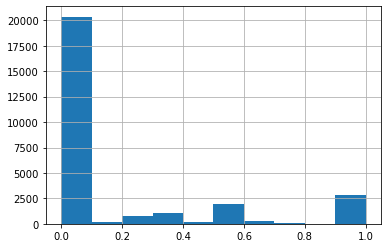

In [26]:
test_item["sensibilidad"].hist()

In [27]:
test_item["sensibilidad"].describe()

count    27822.000000
mean         0.171703
std          0.324568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: sensibilidad, dtype: float64